# Heart Stroke Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/jabedkhan/MacOS Disk 1/Machine Learning/Project 2/Heart Disease Prediction/heart.csv')

# 🧾 Heart Disease Dataset Reference

| **Column**         | **Meaning**                       | **Values / Range (from dataset)**                                                              | **Medical Notes**                                                                      |
| ------------------ | --------------------------------- | ---------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------- |
| **Age**            | Patient’s age                     | 28 – 77 years                                                                                  | Older age increases heart risk                                                         |
| **Sex**            | Gender                            | `M` (Male), `F` (Female)                                                                       | Males have higher risk, but post-menopausal women also at risk                         |
| **ChestPainType**  | Type of chest pain                | `ATA` (Atypical Angina), `NAP` (Non-Anginal Pain), `ASY` (Asymptomatic), `TA` (Typical Angina) | Angina is a strong symptom of heart disease; ASY is risky as silent                    |
| **RestingBP**      | Resting blood pressure (mmHg)     | 0 – 200                                                                                        | ✅ Normal <120; ⚠️ Pre-high 120–139; ❌ High ≥140. Values `0` are invalid (missing data) |
| **Cholesterol**    | Serum cholesterol (mg/dL)         | 0 – 603                                                                                        | ✅ Normal <200; ⚠️ Borderline 200–239; ❌ High ≥240. Values `0` likely missing           |
| **FastingBS**      | Fasting blood sugar               | `0` (<120 mg/dL), `1` (≥120 mg/dL)                                                             | 1 = Diabetic threshold                                                                 |
| **RestingECG**     | Resting electrocardiogram         | `Normal`, `ST` (ST-T abnormality), `LVH` (Left Ventricular Hypertrophy)                        | Abnormalities show possible heart issues                                               |
| **MaxHR**          | Maximum heart rate achieved       | 60 – 202 bpm                                                                                   | Expected max ≈ 220 − Age. Lower may mean poor cardiac fitness                          |
| **ExerciseAngina** | Exercise-induced angina           | `Y` (Yes), `N` (No)                                                                            | Pain during exercise indicates ischemia                                                |
| **Oldpeak**        | ST depression (exercise vs. rest) | -2.6 – 6.2                                                                                     | Higher values = more risk. Negative values rare but possible                           |
| **ST\_Slope**      | Slope of peak exercise ST segment | `Up` (Normal), `Flat` (Abnormal), `Down` (Very abnormal)                                       | Flat/Down strongly linked to heart disease                                             |
| **HeartDisease**   | Target label (diagnosis)          | `0` = No, `1` = Yes                                                                            | \~55% positive cases in dataset                                                        |


In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# ❤️ Chest Pain Type (ChestPainType)

    This column is categorical. In our dataset, values are:

    ATA (Atypical Angina) → Chest pain not related to exertion.

    NAP (Non-Anginal Pain) → Pain not related to heart (could be gastric, muscular, etc.).

    ASY (Asymptomatic) → No chest pain but may still have heart issues.

    TA (Typical Angina) → Classic exertion-related chest pain (sometimes included as "TA" in datasets).

👉 These are important risk indicators for heart disease and must be encoded (One-Hot or Label Encoding) for ML.

# 🧪 Cholesterol (Cholesterol)

    From the dataset:

    Minimum: 0 (likely missing/erroneous data – cholesterol can’t be zero).

    Maximum: 603 mg/dL

    Median (50%): 223 mg/dL

# Medical reference ranges (mg/dL):

    ✅ Desirable: < 200

    ⚠️ Borderline high: 200–239

    ❌ High risk: ≥ 240

👉 In ML, you might treat 0 as missing and consider imputing (median/mean).

# 💉 Resting Blood Pressure (RestingBP)

    From the dataset:
    
    Minimum: 0 (again unrealistic, treat as missing data)
    
    Maximum: 200 mmHg
    
    Median (50%): 130 mmHg
    
# Medical reference ranges (mmHg):

    ✅ Normal: < 120/80
    
    ⚠️ Elevated / Pre-hypertension: 120–139
    
    ❌ Hypertension: ≥ 140
    
    👉 Many values in your dataset fall in the elevated–hypertension range, which makes sense for heart patients.

# 🟢 Good Levels (Healthy Reference)

    Cholesterol: < 200 mg/dL
    
    Resting BP: < 120 mmHg systolic
    
    Chest Pain: Ideally No angina or NAP, but ASY is tricky (hidden heart disease risk).

In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# 🧪 FastingBS (Fasting Blood Sugar)

    Values in dataset: 0 or 1
    
    Meaning:
    
    0 → Fasting blood sugar < 120 mg/dL (normal)
    
    1 → Fasting blood sugar ≥ 120 mg/dL (diabetic range)
    
    Use: Binary feature showing whether the patient has high fasting sugar.

# 🩻 RestingECG (Resting Electrocardiogram Results)

    Values in dataset:
    
    Normal → Normal ECG
    
    ST → ST-T wave abnormality (sign of ischemia or heart strain)
    
    LVH → Left Ventricular Hypertrophy (heart muscle thickening, risk of heart disease)
    
    Use: Categorical variable (needs encoding for ML).

# ❤️‍🔥 MaxHR (Maximum Heart Rate Achieved)

    Values in dataset:
    
    Minimum: 60 bpm
    
    Maximum: 202 bpm
    
    Median: 138 bpm
    
    Medical reference:
    
    Typical Maximum HR ≈ 220 − Age (rough estimate).
    
    Lower values may indicate poor fitness or blocked arteries.

#  🏃 ExerciseAngina (Exercise-Induced Angina)

    Values in dataset: Y (Yes) / N (No)
    
    Meaning:
    
    Y → Chest pain during exercise (bad sign for heart health)
    
    N → No exercise-induced chest pain
    
    Use: Strong binary predictor of heart disease.

# 📉 Oldpeak (ST Depression Induced by Exercise)

    Values in dataset:
    
    Range: -2.6 to 6.2
    
    Median: 0.6
    
    Meaning:
    
    Measures depression in the ST segment of ECG during exercise.
    
    Higher values = worse outcome, more likely heart disease.
    
    Note: Negative values are rare but can appear due to measurement or baseline shift.

# 📈 ST_Slope (Slope of Peak Exercise ST Segment)

    Values in dataset:
    
    Up → Upsloping (usually normal, healthy)
    
    Flat → Flat (abnormal, higher risk)
    
    Down → Downsloping (serious abnormality, strong risk factor)
    
    Use: Important categorical variable for ML.

# ❤️ HeartDisease (Target Label)

    Values in dataset:
    
    0 → No heart disease
    
    1 → Heart disease present

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.duplicated().sum()

np.int64(0)

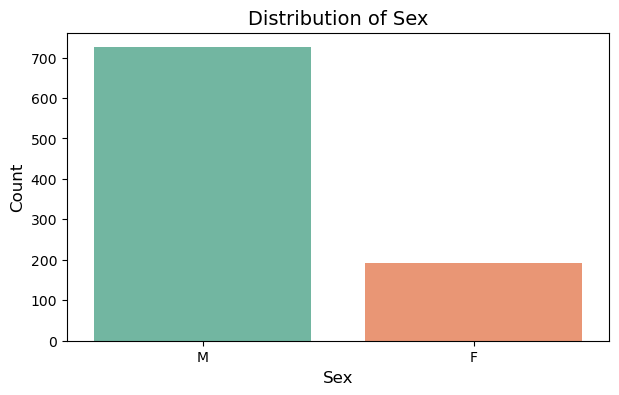

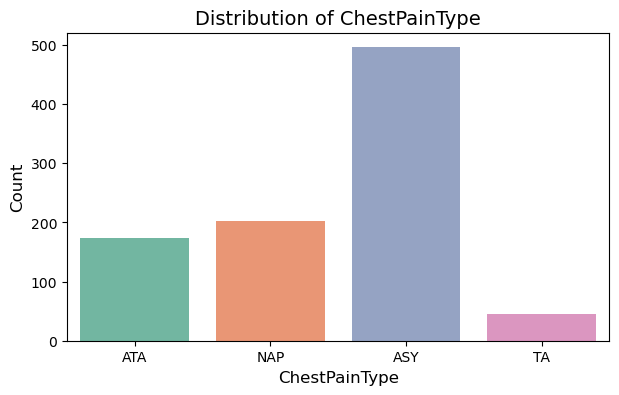

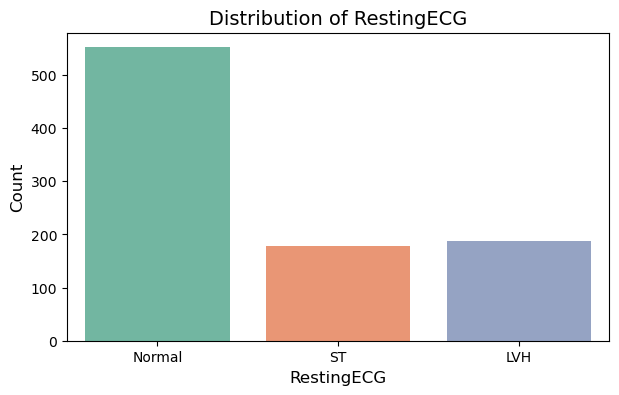

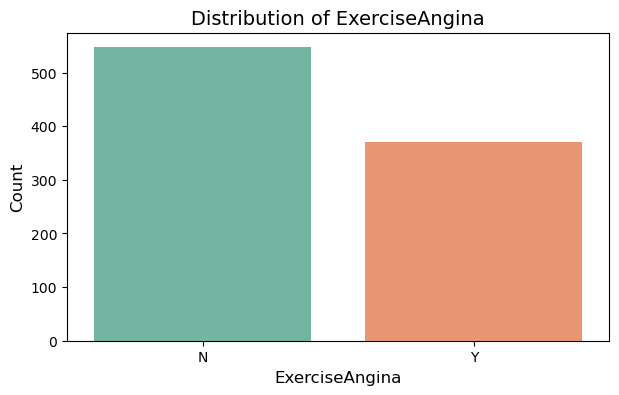

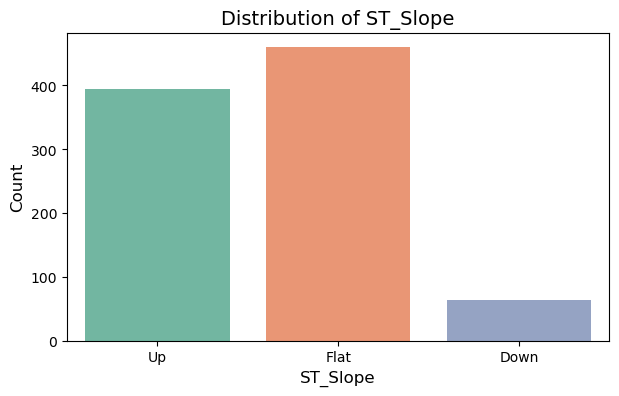

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Loop through each categorical column and plot
for col in categorical_cols:
    plt.figure(figsize=(7, 4))  # set figure size
    
    # Countplot -> bar chart that counts frequency of each category
    sns.countplot(x=col, data=df, palette='Set2')
    
    # Add title and labels
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Show plot
    plt.show()


In [10]:
# Catergorical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

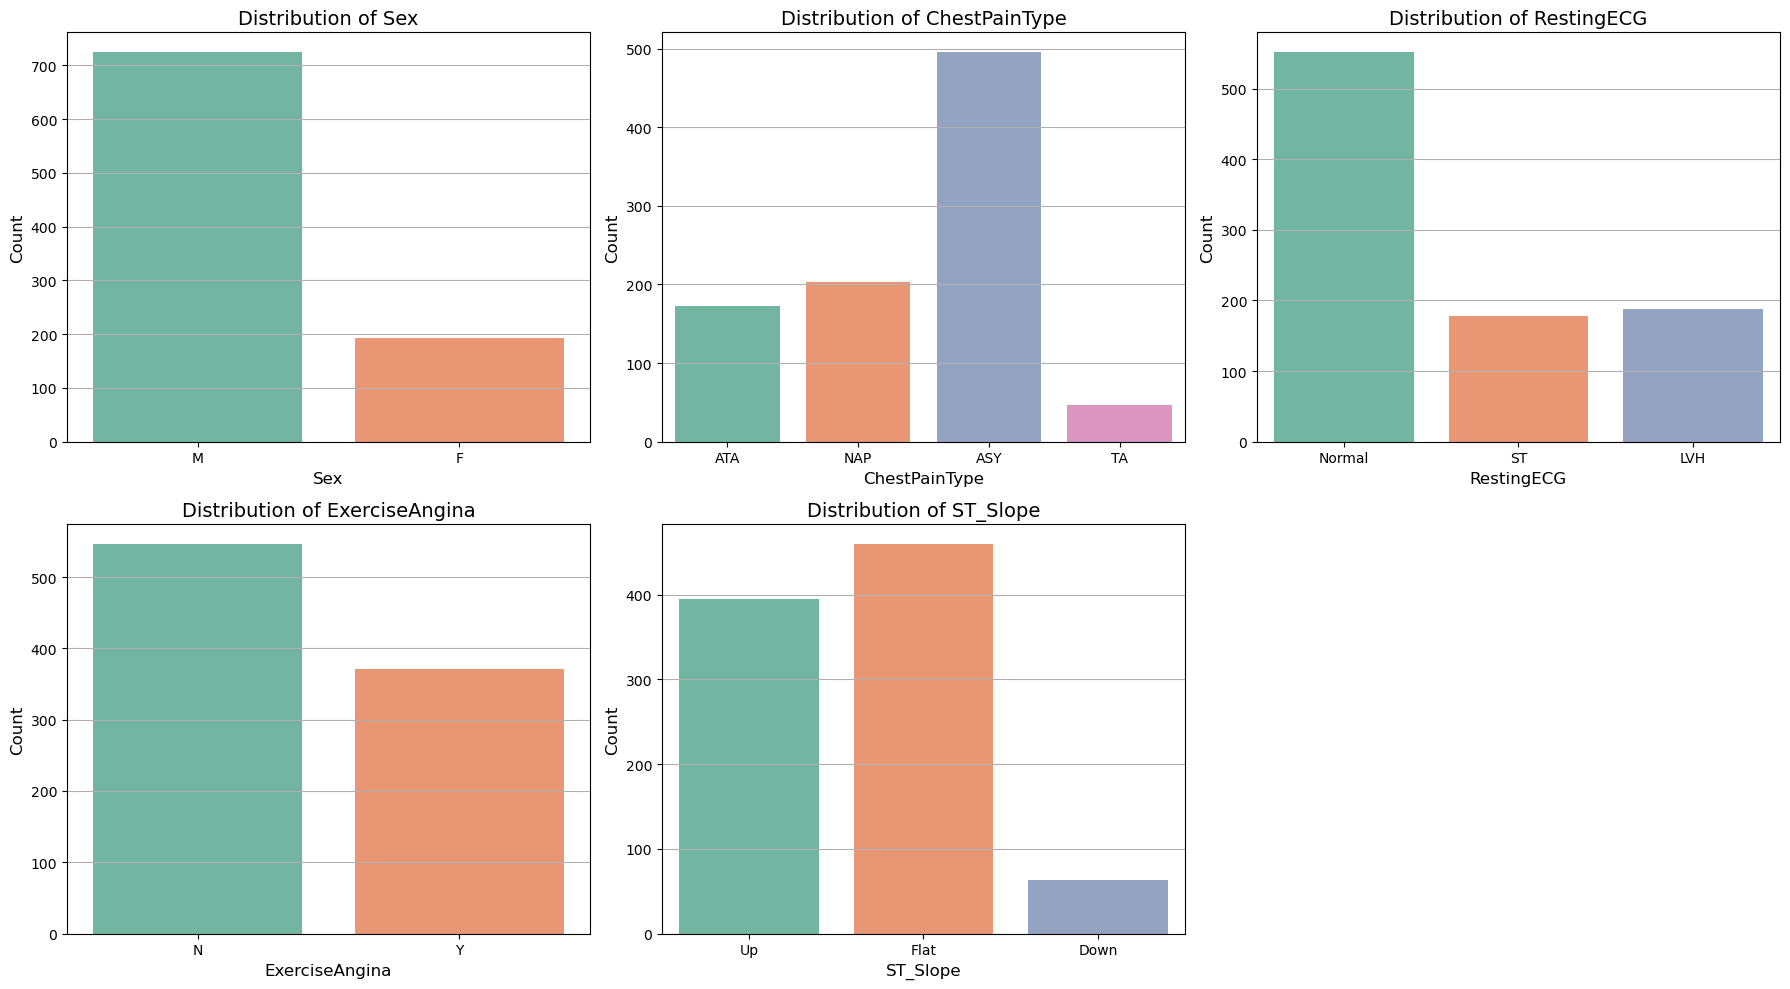

In [11]:
# Create subplots (2 rows, 3 columns -> enough space for 5 charts)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # bigger figure size
axes = axes.flatten()  # flatten 2D array of axes into 1D for easy looping

# Loop through categorical columns and plot
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].grid(axis='y')  # add horizontal grid lines

# Hide the empty subplot (since we have 5 plots, but 2x3 grid = 6 spots)
fig.delaxes(axes[-1])

# Adjust spacing
plt.tight_layout()
plt.savefig("categorical_distributions.png", dpi=300, bbox_inches="tight")
plt.show()

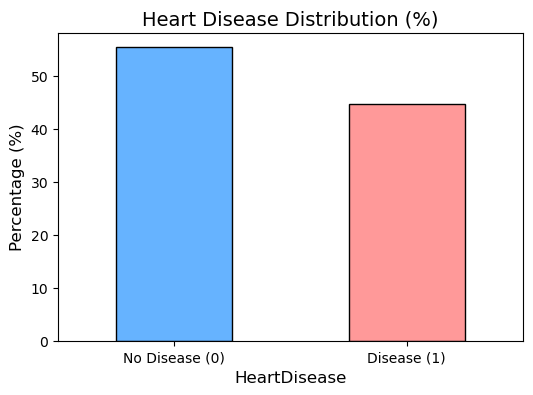

In [12]:
# Plot distribution of HeartDisease
plt.figure(figsize=(6,4))

# Calculate percentage distribution
(df['HeartDisease'].value_counts(normalize=True) * 100).plot(
    kind="bar",
    color=["#66b3ff", "#ff9999"],   # two nice contrasting colors
    edgecolor="black"
)

# Add title and labels
plt.title("Heart Disease Distribution (%)", fontsize=14)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("HeartDisease", fontsize=12)

# Clean x-axis labels (0 = No disease, 1 = Disease)
plt.xticks([0,1], ["No Disease (0)", "Disease (1)"], rotation=0)

plt.show()


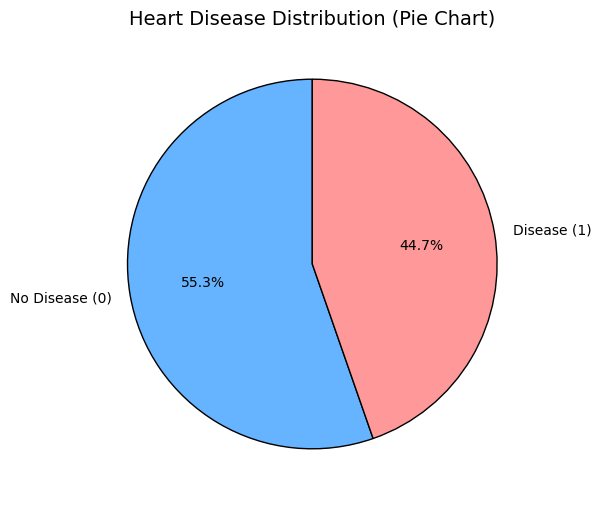

In [13]:
# Pie chart for HeartDisease distribution
plt.figure(figsize=(6,6))
df['HeartDisease'].value_counts(normalize=True).plot(
    kind="pie",
    autopct="%.1f%%",    # show % on slices
    startangle=90,       # rotate so first slice starts at top
    colors=["#66b3ff", "#ff9999"], # custom colors
    labels=["No Disease (0)", "Disease (1)"], # labels
    wedgeprops={'edgecolor':'black'}
)

plt.title("Heart Disease Distribution (Pie Chart)", fontsize=14)
plt.ylabel("")  # remove y-label
plt.show()


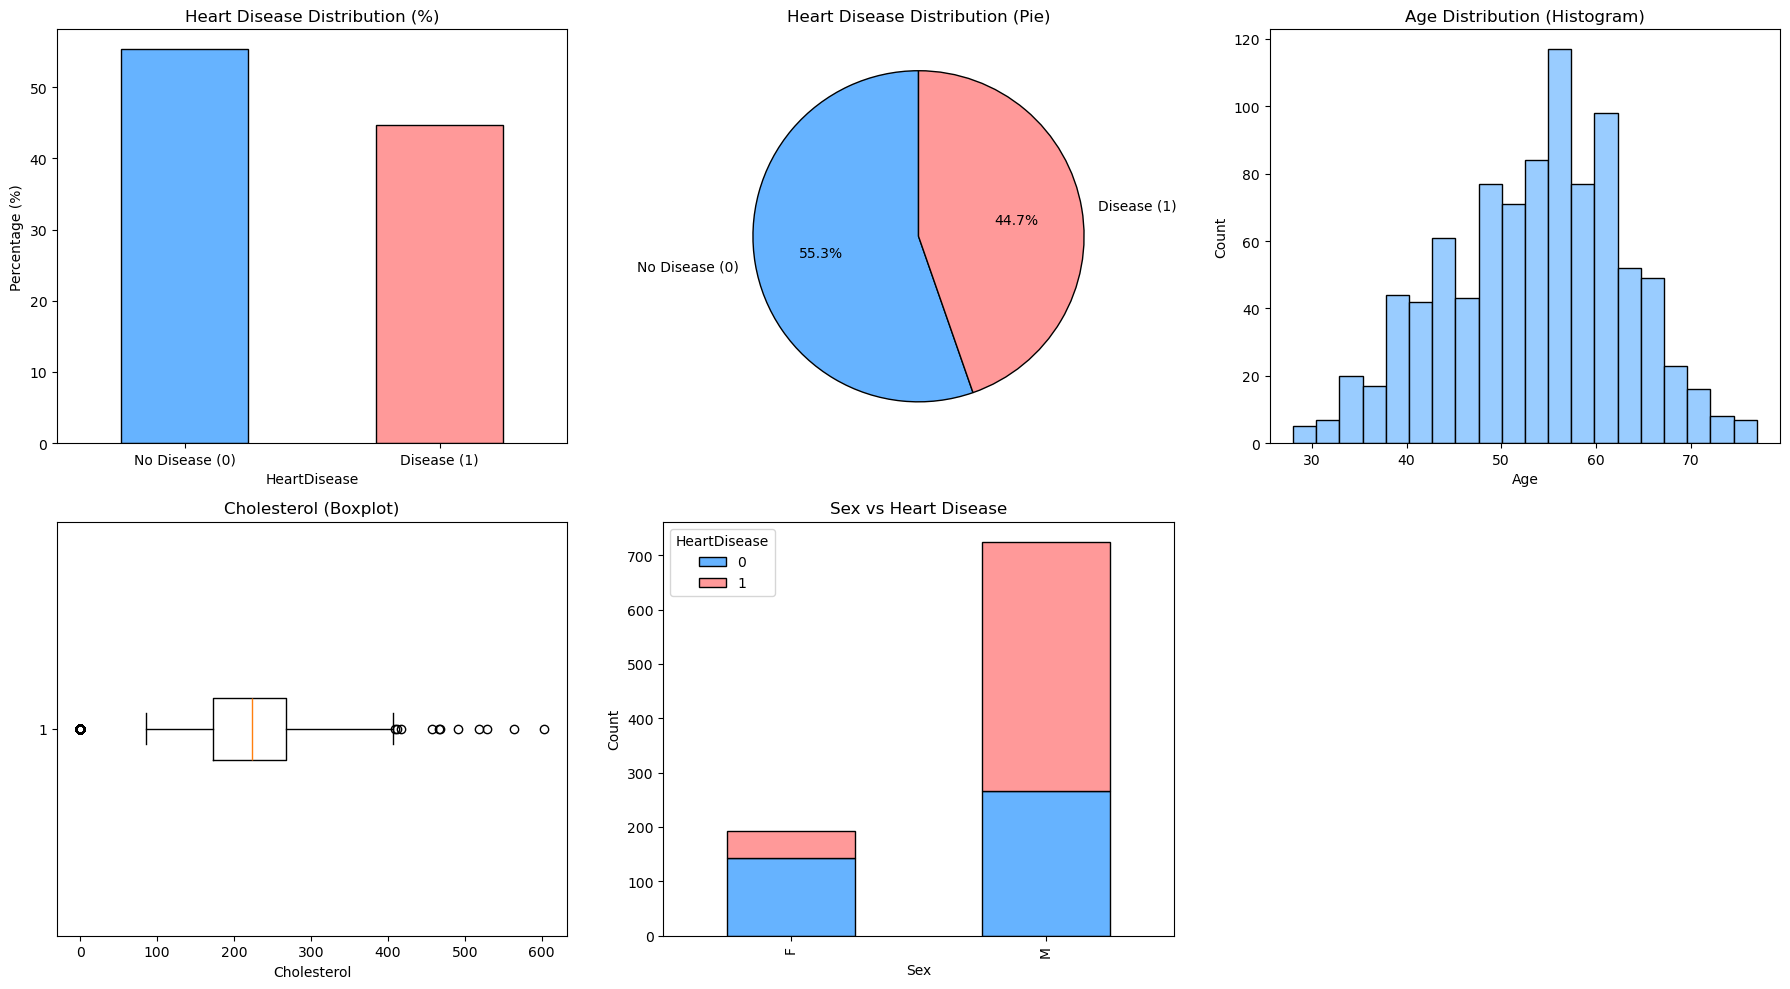

In [14]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  
axes = axes.flatten()

# ==============================
# 1. Bar Chart for HeartDisease
(df['HeartDisease'].value_counts(normalize=True) * 100).plot(
    kind="bar",
    color=["#66b3ff", "#ff9999"],
    edgecolor="black",
    ax=axes[0]
)
axes[0].set_title("Heart Disease Distribution (%)")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_xlabel("HeartDisease")
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["No Disease (0)", "Disease (1)"], rotation=0)

# ==============================
# 2. Pie Chart for HeartDisease
df['HeartDisease'].value_counts(normalize=True).plot(
    kind="pie",
    autopct="%.1f%%",
    startangle=90,
    colors=["#66b3ff", "#ff9999"],
    labels=["No Disease (0)", "Disease (1)"],
    wedgeprops={'edgecolor':'black'},
    ax=axes[1]
)
axes[1].set_title("Heart Disease Distribution (Pie)")
axes[1].set_ylabel("")

# ==============================
# 3. Histogram for Age
axes[2].hist(df['Age'], bins=20, edgecolor='black', color="#99ccff")
axes[2].set_title("Age Distribution (Histogram)")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Count")

# ==============================
# 4. Boxplot for Cholesterol
axes[3].boxplot(df['Cholesterol'], vert=False)
axes[3].set_title("Cholesterol (Boxplot)")
axes[3].set_xlabel("Cholesterol")

# ==============================
# 5. Stacked Bar: Sex vs HeartDisease
pd.crosstab(df['Sex'], df['HeartDisease']).plot(
    kind="bar", stacked=True, 
    color=["#66b3ff","#ff9999"], 
    edgecolor="black", 
    ax=axes[4]
)
axes[4].set_title("Sex vs Heart Disease")
axes[4].set_xlabel("Sex")
axes[4].set_ylabel("Count")

# Hide the last empty subplot (2x3 grid has 6 slots, we only use 5)
fig.delaxes(axes[5])

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig("heart_disease_visualizations.png", dpi=300, bbox_inches="tight")

# Show figure
plt.show()


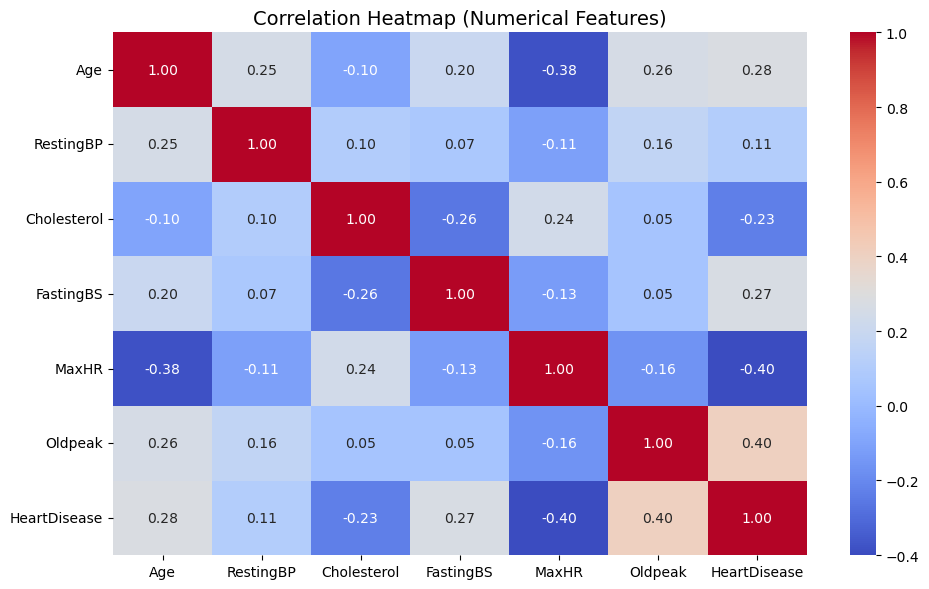

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    df.corr(numeric_only=True), 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f"   # show numbers with 2 decimal places
)
plt.title('Correlation Heatmap (Numerical Features)', fontsize=14)
plt.tight_layout()

# Save before show
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

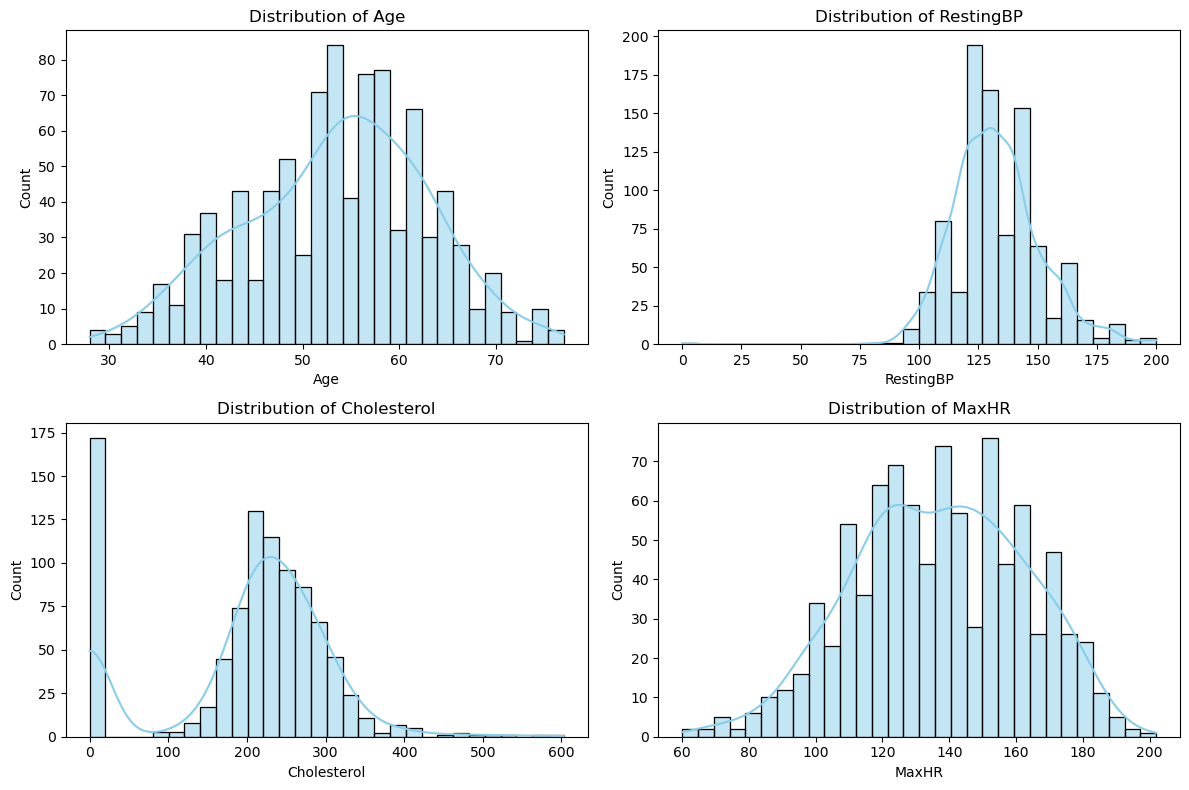

In [16]:
plt.figure(figsize=(12, 8))

# Function to plot histogram + KDE
def plotting(var, num):
    plt.subplot(2, 2, num)   # 2 rows, 2 cols, position = num
    sns.histplot(df[var], kde=True, bins=30, color="skyblue", edgecolor="black")
    plt.title(f"Distribution of {var}", fontsize=12)
    plt.xlabel(var)
    plt.ylabel("Count")

# Call function for each variable
plotting('Age', 1)
plotting('RestingBP', 2)
plotting('Cholesterol', 3)
plotting('MaxHR', 4)

# Adjust layout to avoid overlaps
plt.tight_layout()

# Save figure
plt.savefig("numeric_distributions.png", dpi=300, bbox_inches="tight")

# Show figure
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

TARGET = "HeartDisease"
X = df.drop(columns=[TARGET])
y = df[TARGET]

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [20]:
rf = Pipeline(steps=[
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=400, random_state=42))
])

rf.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('clf',
                 RandomForestClassifier(n_estimators=400, random_state=42))])

In [21]:
def predict_patient(model, patient_data):
    patient_df = pd.DataFrame([patient_data])
    prediction = model.predict(patient_df)[0]
    probability = model.predict_proba(patient_df)[0, 1]

    label = "Disease Detected" if prediction == 1 else "No Disease"
    print("Prediction:", label)
    print(f"Probability of Heart Disease: {probability:.2%}")
    return prediction, probability

# Interactive Patient Form

In [23]:
# If ipywidgets isn’t installed, uncomment:
# !pip install ipywidgets

import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display, clear_output, HTML
import pandas as pd
import numpy as np


In [24]:
# Reference ranges (simple, educational guidance)
REF = {
    "Age": {"good": (18, 39), "borderline": (40, 55), "high": (56, 120)},
    "RestingBP": {"good": (0, 119), "borderline": (120, 139), "high": (140, 300)},  # systolic mmHg
    "Cholesterol": {"good": (0, 199), "borderline": (200, 239), "high": (240, 700)},# mg/dL
    "MaxHR": {"good": (140, 220), "borderline": (120, 139), "high": (0, 119)},      # lower can be concerning depending on age
    "Oldpeak": {"good": (0.0, 0.5), "borderline": (0.6, 1.5), "high": (1.6, 10.0)}, # ST depression (approx guidance)
}

def band(value, bands):
    """Return 'good'/'borderline'/'high' based on bands dict with (min,max) tuples."""
    for k, (lo, hi) in bands.items():
        if lo <= value <= hi:
            return k
    return "n/a"

def color_for_band(b):
    return {"good":"green", "borderline":"orange", "high":"red"}.get(b, "gray")

def assess_label(name, value):
    b = band(value, REF[name])
    c = color_for_band(b)
    return f"<b>{name}</b>: <span style='color:{c}'>{value} → {b}</span>"


In [26]:
# Use dataset categories to keep choices valid
sex_opts = sorted(df["Sex"].unique().tolist())
cp_opts = sorted(df["ChestPainType"].unique().tolist())
ecg_opts = sorted(df["RestingECG"].unique().tolist())
angina_opts = sorted(df["ExerciseAngina"].unique().tolist())
slope_opts = sorted(df["ST_Slope"].unique().tolist())

# Numeric sliders with sensible bounds
age_w = widgets.IntSlider(description="Age", value=54, min=18, max=90, step=1, continuous_update=False)
bp_w = widgets.IntSlider(description="RestingBP", value=130, min=80, max=220, step=1, continuous_update=False)
chol_w = widgets.IntSlider(description="Cholesterol", value=220, min=80, max=700, step=1, continuous_update=False)
fbs_w = widgets.Dropdown(description="FastingBS", options=[0,1], value=0)  # 0 = <120 mg/dL, 1 = ≥120 mg/dL
maxhr_w = widgets.IntSlider(description="MaxHR", value=140, min=60, max=220, step=1, continuous_update=False)
oldpeak_w = widgets.FloatSlider(description="Oldpeak", value=0.6, min=-2.6, max=6.2, step=0.1, readout_format=".1f", continuous_update=False)

sex_w = widgets.Dropdown(description="Sex", options=sex_opts, value=sex_opts[0])
cp_w = widgets.Dropdown(description="ChestPainType", options=cp_opts, value=cp_opts[0])
ecg_w = widgets.Dropdown(description="RestingECG", options=ecg_opts, value=ecg_opts[0])
angina_w = widgets.Dropdown(description="ExerciseAngina", options=angina_opts, value=angina_opts[0])
slope_w = widgets.Dropdown(description="ST_Slope", options=slope_opts, value=slope_opts[0])

predict_btn = widgets.Button(description="Predict", button_style="primary")
save_btn = widgets.Button(description="Save Result to CSV")
out = widgets.Output()

# Quick reference captions
ref_html = widgets.HTML("""
<ul style='margin-top:0'>
<li><b>Cholesterol</b>: Good &lt; 200, Borderline 200–239, High ≥ 240 mg/dL</li>
<li><b>RestingBP (systolic)</b>: Normal &lt; 120, Borderline 120–139, High ≥ 140 mmHg</li>
<li><b>Oldpeak</b>: Higher → worse (exercise-induced ST depression)</li>
<li><b>MaxHR</b>: Rough guide = 220 − age (lower response can be concerning)</li>
</ul>
""")


In [27]:
# A simple in-memory log of predictions
pred_log = []

def on_predict_clicked(_):
    with out:
        clear_output(wait=True)
        # Collect patient data
        patient = {
            "Age": age_w.value,
            "Sex": sex_w.value,
            "ChestPainType": cp_w.value,
            "RestingBP": bp_w.value,
            "Cholesterol": chol_w.value,
            "FastingBS": int(fbs_w.value),
            "RestingECG": ecg_w.value,
            "MaxHR": maxhr_w.value,
            "ExerciseAngina": angina_w.value,
            "Oldpeak": float(oldpeak_w.value),
            "ST_Slope": slope_w.value
        }

        # Predict (rf must be your trained Pipeline from earlier)
        proba = rf.predict_proba(pd.DataFrame([patient]))[0,1]
        pred = int(proba >= 0.5)

        # Display result
        label = "Disease Detected" if pred == 1 else "No Disease"
        color = "red" if pred == 1 else "green"
        display(HTML(f"<h3 style='margin:0'>Prediction: <span style='color:{color}'>{label}</span></h3>"))
        display(HTML(f"<p style='margin:4px 0 10px 0'><b>Probability of Heart Disease:</b> {proba:.1%}</p>"))

        # Per-feature quick assessment (numeric)
        assess_lines = [
            assess_label("Age", age_w.value),
            assess_label("RestingBP", bp_w.value),
            assess_label("Cholesterol", chol_w.value),
            assess_label("MaxHR", maxhr_w.value),
            assess_label("Oldpeak", float(oldpeak_w.value)),
        ]
        display(HTML("<div>" + "<br/>".join(assess_lines) + "</div>"))

        # Keep a copy for saving later
        row = patient.copy()
        row.update({"PredictedLabel": pred, "PredictedProb": proba})
        pred_log.append(row)

def on_save_clicked(_):
    with out:
        if not pred_log:
            clear_output(wait=True)
            display(HTML("<p>No predictions yet to save.</p>"))
            return
        df_log = pd.DataFrame(pred_log)
        df_log.to_csv("patient_predictions_log.csv", index=False)
        clear_output(wait=True)
        display(HTML("<p><b>Saved:</b> patient_predictions_log.csv</p>"))

predict_btn.on_click(on_predict_clicked)
save_btn.on_click(on_save_clicked)


In [28]:
# Left and right columns to keep things tidy
left = VBox([age_w, sex_w, cp_w, fbs_w, maxhr_w])
right = VBox([bp_w, chol_w, ecg_w, angina_w, oldpeak_w])

display(HTML("<h3 style='margin-bottom:4px'>Patient Input Form</h3>"))
display(ref_html)
display(HBox([left, widgets.Label("   "), right]))
display(HBox([predict_btn, widgets.Label("   "), save_btn]))
display(out)


HTML(value="\n<ul style='margin-top:0'>\n<li><b>Cholesterol</b>: Good &lt; 200, Borderline 200–239, High ≥ 240…

Output()